C:\Users\karti\AppData\Local\Temp\ipykernel_31028\1009454640.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\karti\AppData\Loca

Time series is non-stationary, differencing it.


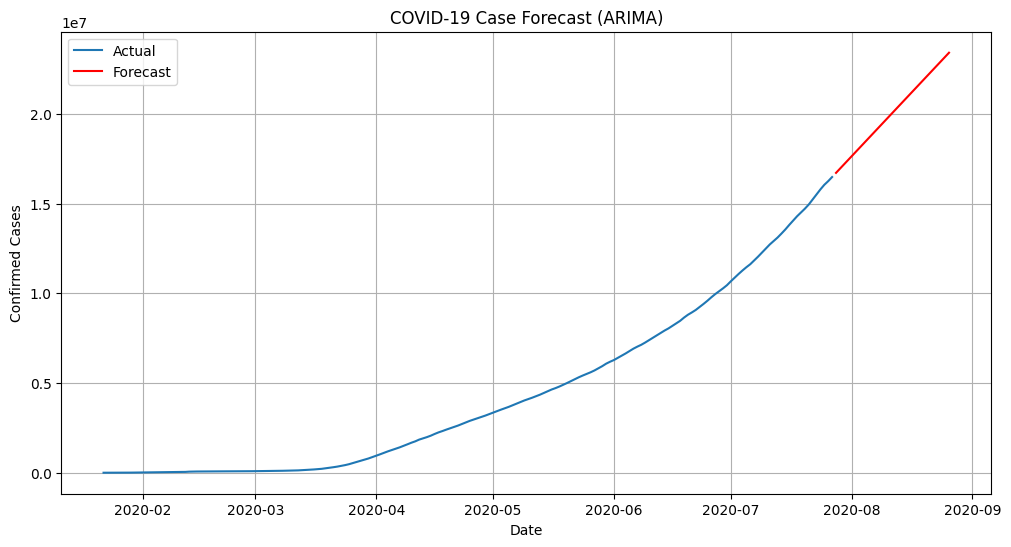

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load and prepare data
df = pd.read_csv("covid_19_clean_complete.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.groupby('Date')[['Confirmed']].sum().sort_index()
df.columns = ['cases']

# Optional: Check stationarity
result = adfuller(df['cases'])
if result[1] > 0.05:
    print("Time series is non-stationary, differencing it.")
    ts = df['cases'].diff().dropna()
else:
    ts = df['cases']

# -----------------------------
# 🔧 Fit ARIMA Model
# -----------------------------
# (You may want to tune (p,d,q); here we use a simple (1,1,1))
model = ARIMA(df['cases'], order=(1, 1, 1))  # ARIMA(p=1, d=1, q=1)
model_fit = model.fit()

# -----------------------------
# 🔮 Forecasting
# -----------------------------
n_steps = 30  # forecast 30 days
forecast = model_fit.forecast(steps=n_steps)

# Create forecast index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_steps)

# -----------------------------
# 📈 Plot Actual vs Forecast
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cases'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title("COVID-19 Case Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid(True)
plt.show()
